In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2gray
from skimage.util import random_noise
from statistics import mode

# Questão 01

In [116]:
def borda_ignore(img, filtro):
    result = np.copy(img)
    if len(img.shape) == 3:
        for d in range(img.shape[2]):
            for i in range(1,img.shape[0]-1):
                for j in range(1,img.shape[1]-1):
                    janela = img[i-1:i+2, j-1:j+2, d]
                    result[i,j,d] = ( janela * filtro).sum() 
    else:
        for i in range(1,img.shape[0]-1):
            for j in range(1,img.shape[1]-1):
                janela = img[i-1:i+2, j-1:j+2]
                result[i,j] = (janela * filtro).sum()    
    return result

In [117]:
def zero_padding(img, a, b):
    img_zero = np.zeros((img.shape[0]+(a*2), img.shape[1]+(b*2)), dtype='float')
    img_zero[a:-a,b:-b] = img
    return img_zero

In [118]:
def replicar_padding(img, a, b):
    img_replicar = np.zeros((img.shape[0]+(a*2), img.shape[1]+(b*2)), dtype='float')
    img_replicar[a:-a,b:-b] = img

    for r in range(a): #linhas
        img_replicar[r] = img_replicar[a]
        img_replicar[-r-1] = img_replicar[-a-1]

    for c in range(b): #colunas
        for r in range(img.shape[0] + 2 * b):
            img_replicar[r][c] = img_replicar[r][b]
            img_replicar[r][-c-1] = img_replicar[r][-b-1]

    return img_replicar

In [157]:
def espelhar_padding(img,a,b):
    img_espelho = np.zeros((img.shape[0]+(a*2), img.shape[1]+(b*2)), dtype='float')
    img_espelho[a:-a,b:-b] = img
    for r in range(a):
        img_espelho[r] = img_espelho[a*2-r-1]
        img_espelho[-r-1] = img_espelho[-a*2+r]

    for c in range(b):
        for r in range(img.shape[0] + 2 * b):
            img_espelho[r][c] = img_espelho[r][b*2-c-1]
            img_espelho[r][-c-1] = img_espelho[r][-b*2+c]

    return img_espelho

In [134]:
def definir_padding(img, filtro, borda):
    m = filtro.shape[0]
    n = filtro.shape[1]
    a = (m-1)//2
    b = (n-1)//2

    imgPad = np.zeros((img.shape[0]+(a*2), img.shape[1]+(b*2)), dtype='float')
    
    if borda == 'zero':
        if len(img.shape)==3:
            imgPad = np.zeros((img.shape[0]+(a*2), img.shape[1]+(b*2), img.shape[2]), dtype='float')
            for d in range(img.shape[2]):
                imgPad[:,:,d] = zero_padding(img[:,:,d],a,b)

        else:
            imgPad = zero_padding(img, a, b)
        

    
    elif borda == 'replicar':
        if len(img.shape)==3:
            imgPad = np.zeros((img.shape[0]+(a*2), img.shape[1]+(b*2), img.shape[2]), dtype='float')
            for d in range(img.shape[2]):
                imgPad[:,:,d] = replicar_padding(img[:,:,d],a,b)

        else:
            imgPad = replicar_padding(img, a, b)
        

    elif borda == 'espelhar':
        if len(img.shape)==3:
            imgPad = np.zeros((img.shape[0]+(a*2), img.shape[1]+(b*2), img.shape[2]), dtype='float')
            for d in range(img.shape[2]):
                imgPad[:,:,d] = espelhar_padding(img[:,:,d],a,b)

        else:
            imgPad = espelhar_padding(img, a, b)
        
            
    else:
        imgPad = None
        Exception('Borda não definida')
    
    return imgPad, a, b

In [160]:
matriz = np.arange(1,17).reshape(4,4)
matriz

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [161]:
zero_padding(matriz, 1, 1)

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  3.,  4.,  0.],
       [ 0.,  5.,  6.,  7.,  8.,  0.],
       [ 0.,  9., 10., 11., 12.,  0.],
       [ 0., 13., 14., 15., 16.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [162]:
replicar_padding(matriz, 1, 1)

array([[ 1.,  1.,  2.,  3.,  4.,  4.],
       [ 1.,  1.,  2.,  3.,  4.,  4.],
       [ 5.,  5.,  6.,  7.,  8.,  8.],
       [ 9.,  9., 10., 11., 12., 12.],
       [13., 13., 14., 15., 16., 16.],
       [13., 13., 14., 15., 16., 16.]])

In [163]:
espelhar_padding(matriz,2,2)

array([[ 6.,  5.,  5.,  6.,  7.,  8.,  8.,  7.],
       [ 2.,  1.,  1.,  2.,  3.,  4.,  4.,  3.],
       [ 2.,  1.,  1.,  2.,  3.,  4.,  4.,  3.],
       [ 6.,  5.,  5.,  6.,  7.,  8.,  8.,  7.],
       [10.,  9.,  9., 10., 11., 12., 12., 11.],
       [14., 13., 13., 14., 15., 16., 16., 15.],
       [14., 13., 13., 14., 15., 16., 16., 15.],
       [10.,  9.,  9., 10., 11., 12., 12., 11.]])

In [121]:
def borda_padding(img,filtro, borda):
    imgPad, a, b = definir_padding(img, filtro, borda)
    result = np.copy(img)
    if len(img.shape)==3:
        for d in range(img.shape[2]):
            for i in range(a, imgPad.shape[0]-1):
                for j in range(b, imgPad.shape[1]-1):
                    janela = imgPad[i-1:i+2, j-1:j+2, d]
                    result[i-1,j-1,d] = (janela * filtro).sum()
    
    else:
        for i in range(a, imgPad.shape[0]-1):
            for j in range(b, imgPad.shape[1]-1):
                janela = imgPad[i-1:i+2, j-1:j+2]
                result[i-1,j-1] = (janela * filtro).sum()
    
    return result

In [122]:
def convolucao(imagem, filtro, borda='ignore'):
    if borda=='ignore':
        imagem_processada = borda_ignore(imagem, filtro)
    
    else:
        imagem_processada = borda_padding(imagem, filtro, borda)

    return imagem_processada

In [149]:
#Filtros
filtro_media = np.ones((3,3))/9
filtro_media_ponderada = np.array(([1,3,1],[3,6,3],[1,3,1]))/22
filtro_realce = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
filtro_gauss = np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])

filtros = [filtro_media, 
           filtro_media_ponderada,
           filtro_realce,
           filtro_gauss ]

filtros

[array([[0.11111111, 0.11111111, 0.11111111],
        [0.11111111, 0.11111111, 0.11111111],
        [0.11111111, 0.11111111, 0.11111111]]),
 array([[0.04545455, 0.13636364, 0.04545455],
        [0.13636364, 0.27272727, 0.13636364],
        [0.04545455, 0.13636364, 0.04545455]]),
 array([[-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1]]),
 array([[0.0625, 0.125 , 0.0625],
        [0.125 , 0.25  , 0.125 ],
        [0.0625, 0.125 , 0.0625]])]

In [124]:
img = imread('sailor_moon.jpg')
img = np.interp(img, (img.min(), img.max()), (0, 1))
img_gray = rgb2gray(img)
img_ruido = random_noise(img, mode='s&p')
img.shape, img_gray.shape, img_ruido.shape

((282, 282, 3), (282, 282), (282, 282, 3))

Text(0.5, 1.0, 'Ruido')

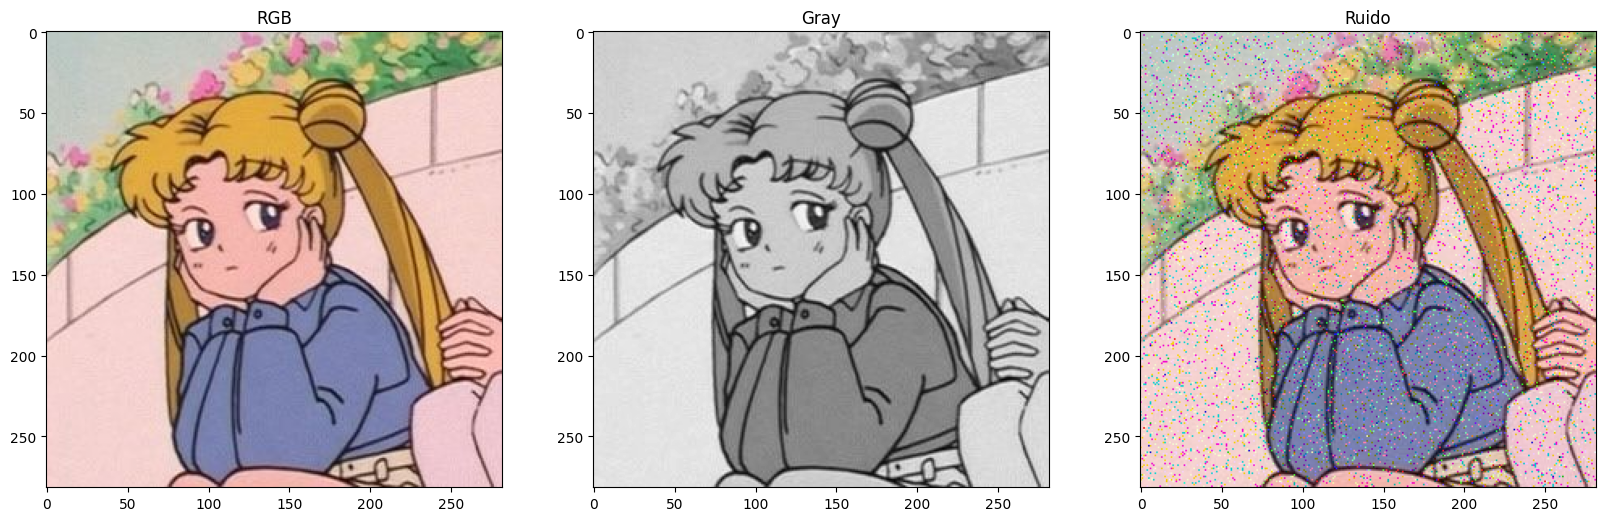

In [ ]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img)
plt.title('RGB')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img_gray, cmap='gray')
plt.title('Gray')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img_ruido)
plt.title('Ruido')

Text(0.5, 1.0, 'Ruido')

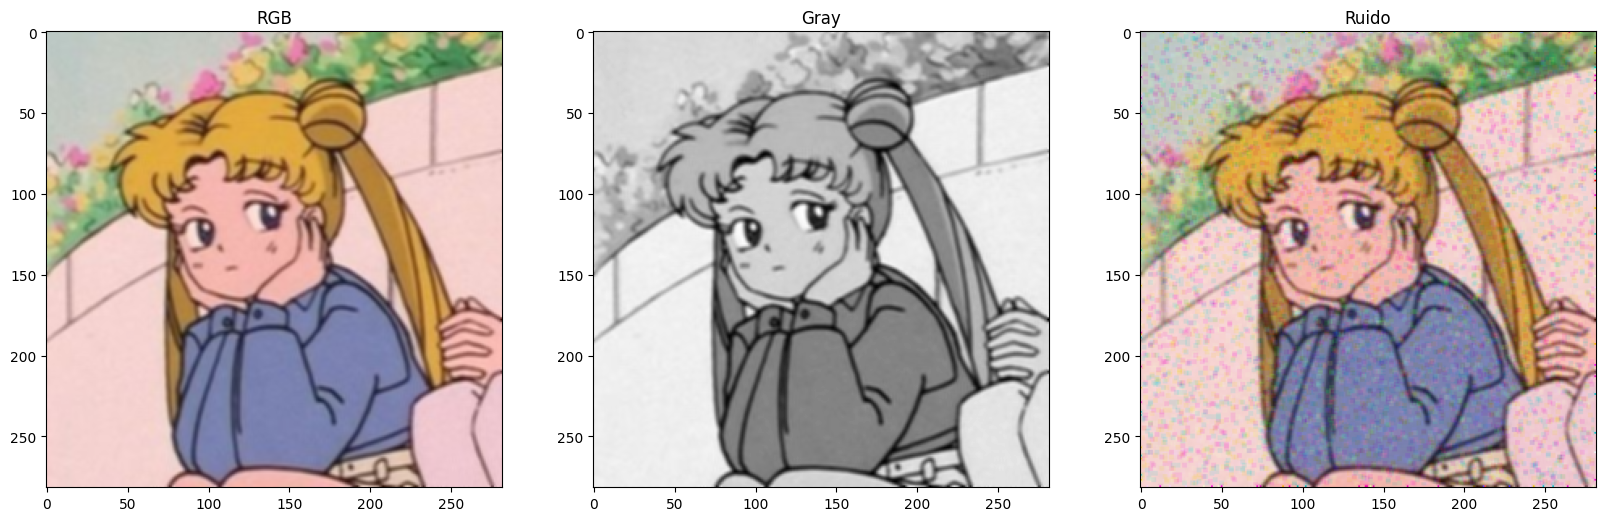

In [ ]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(convolucao(img, filtro_media))
plt.title('RGB')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(convolucao(img_gray, filtro_media), cmap='gray')
plt.title('Gray')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(convolucao(img_ruido, filtro_media))
plt.title('Ruido')

# Questão 02

In [140]:
def mediana(janela):
    return np.median(janela)

In [141]:
def maior(janela):
    return np.max(janela)

In [142]:
def menor(janela):
    return np.min(janela)

In [143]:
def moda(janela):
    return mode(janela.ravel())

In [144]:
def aplicar_filtro(imagem, janela, funcao):
    nova_imagem = np.copy(imagem)

    if len(imagem.shape) == 3:
        for d in range(imagem.shape[2]):
            for i in range(1,imagem.shape[0]-1):
                for j in range(1,imagem.shape[1]-1):
                    janela_imagem = imagem[i-1:i+janela[0]-1, j-1:j+janela[1]-1, d]
                    nova_imagem[i,j,d] = funcao(janela_imagem)
    
    else:
        for i in range(1,imagem.shape[0]-1):
            for j in range(1,imagem.shape[1]-1):
                janela_imagem = imagem[i-1:i+janela[0]-1, j-1:j+janela[1]-1]
                nova_imagem[i, j] = funcao(janela_imagem)
    
    
    return nova_imagem


In [145]:
def filtro_nao_linear(imagem, janela=(3,3), funcao='mediana'):
    if funcao == 'mediana':
        imagem_processada = aplicar_filtro(imagem, janela, mediana)
    elif funcao == 'maior':
        imagem_processada = aplicar_filtro(imagem, janela, maior)
    elif funcao == 'menor':
        imagem_processada = aplicar_filtro(imagem, janela, menor)
    elif funcao == 'moda':
        imagem_processada = aplicar_filtro(imagem, janela, moda)
    else:
        print('Função não definida')
        return None
    
    return imagem_processada

Text(0.5, 1.0, 'Menor')

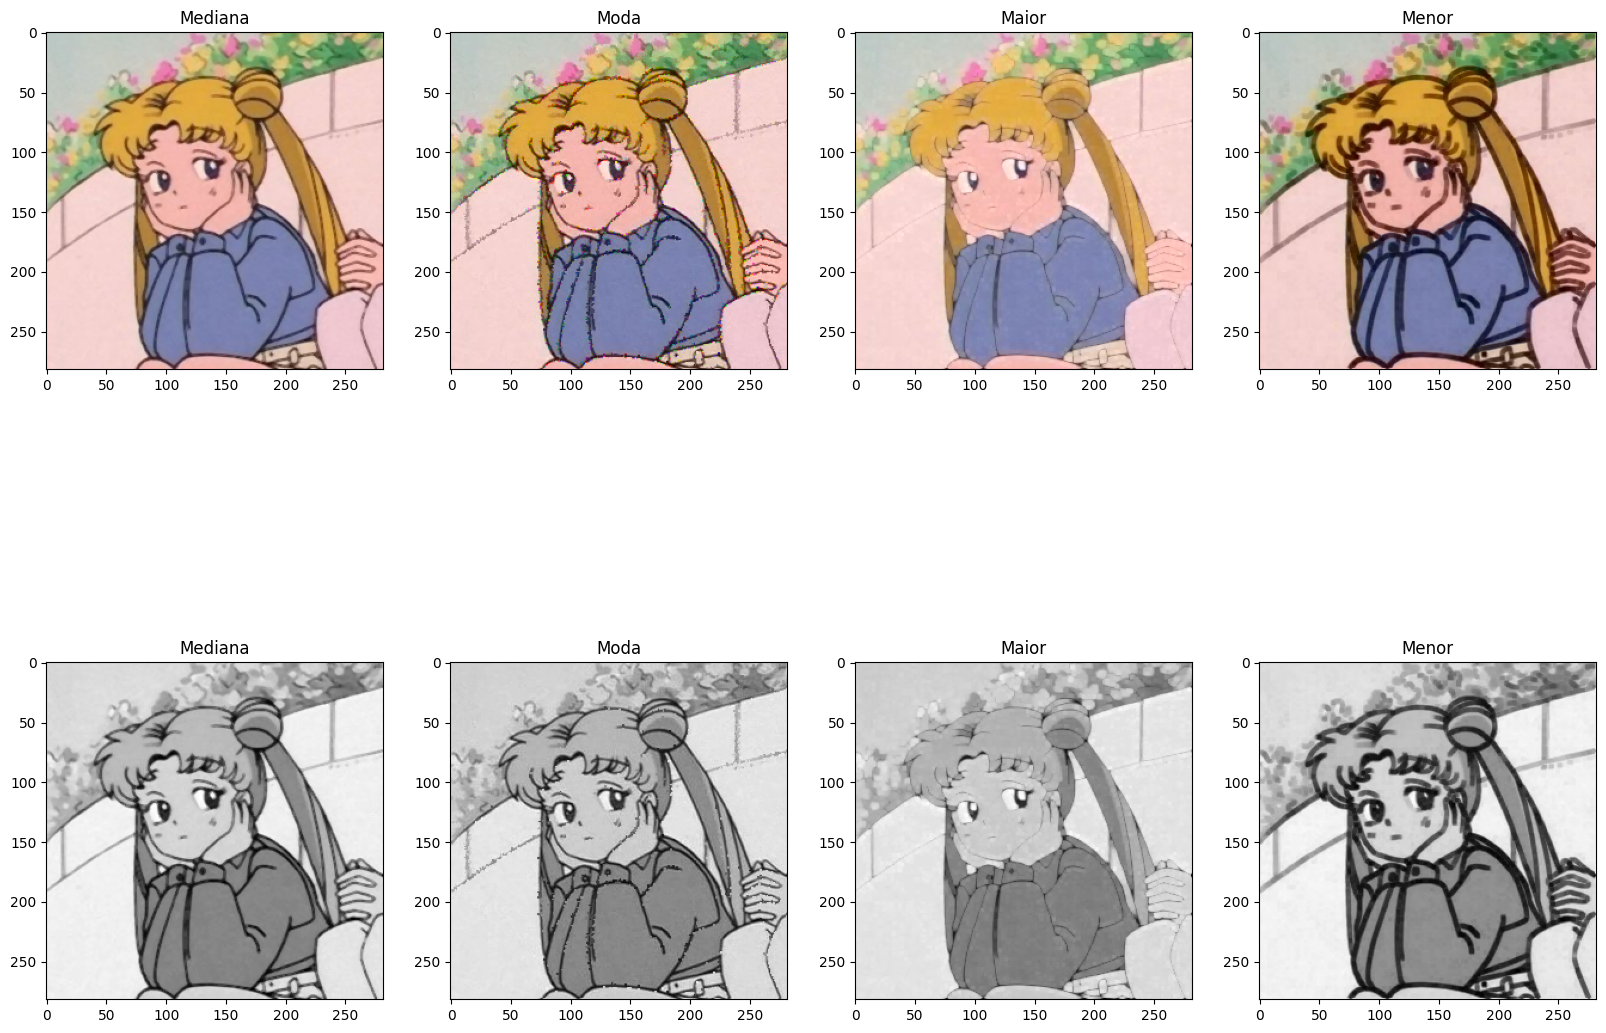

In [146]:
fig, ax = plt.subplots(2, 4, figsize=(20, 15))

ax[0][0].imshow(filtro_nao_linear(img))
ax[0][0].set_title('Mediana')

ax[0][1].imshow(filtro_nao_linear(img, funcao='moda'))
ax[0][1].set_title('Moda')

ax[0][2].imshow(filtro_nao_linear(img, funcao='maior'))
ax[0][2].set_title('Maior')

ax[0][3].imshow(filtro_nao_linear(img, funcao='menor'))
ax[0][3].set_title('Menor')

ax[1][0].imshow(filtro_nao_linear(img_gray), cmap='gray')
ax[1][0].set_title('Mediana')

ax[1][1].imshow(filtro_nao_linear(img_gray, funcao='moda'), cmap='gray')
ax[1][1].set_title('Moda')

ax[1][2].imshow(filtro_nao_linear(img_gray, funcao='maior'), cmap='gray')
ax[1][2].set_title('Maior')

ax[1][3].imshow(filtro_nao_linear(img_gray, funcao='menor'), cmap='gray')
ax[1][3].set_title('Menor')




# Questão 03

In [ ]:
filtro_laplaciano = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
filtro_laplaciano

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

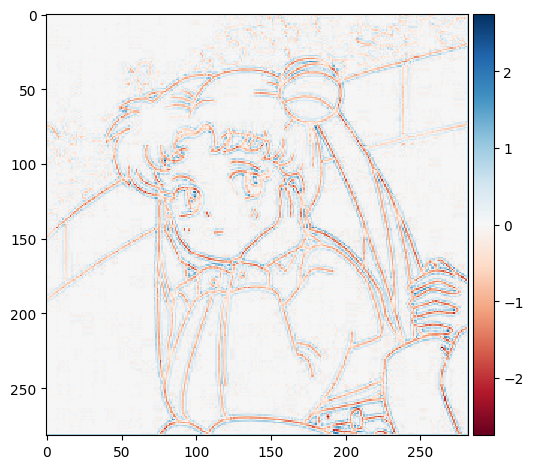

In [ ]:
imshow(convolucao(img_gray,filtro_laplaciano))

In [ ]:
result = img_gray + convolucao(img_gray, filtro_laplaciano)

In [ ]:
# Define o fator de ponderação para a imagem original e a imagem Laplaciana
alpha = 0.9
beta = 1 - alpha

In [ ]:
result2 = alpha * img_gray + beta * convolucao(img_gray, filtro_laplaciano)

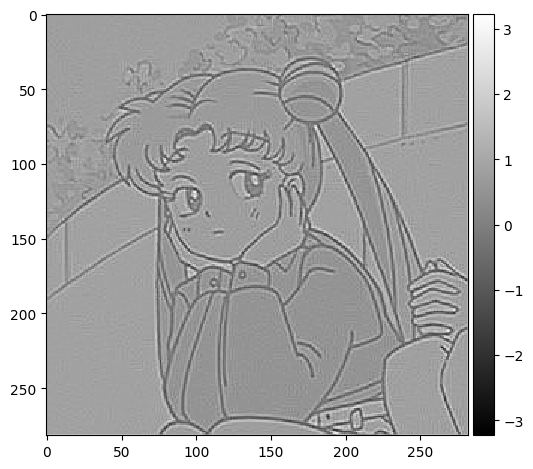

In [ ]:
imshow(result, cmap='gray')

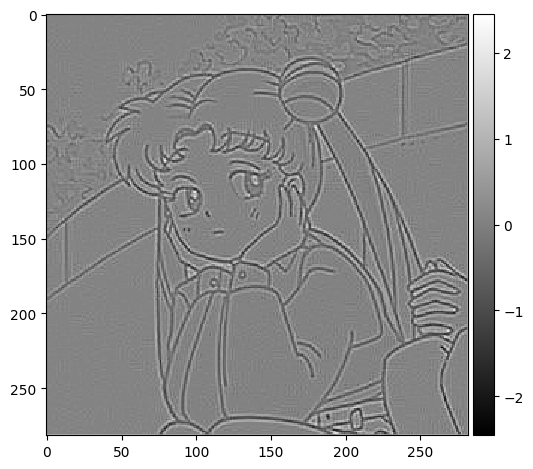

In [ ]:
imshow(result2, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


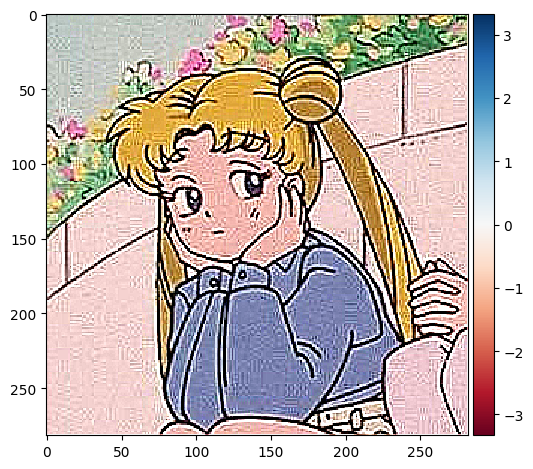

In [ ]:
imshow(img+convolucao(img, filtro_laplaciano))

# Questão 04

# Questão 05

In [ ]:
imagem_media = convolucao(img_ruido, filtro_media)
imagem_mediana = filtro_nao_linear(img_ruido)

Text(0.5, 1.0, 'Imagem com filtro mediana')

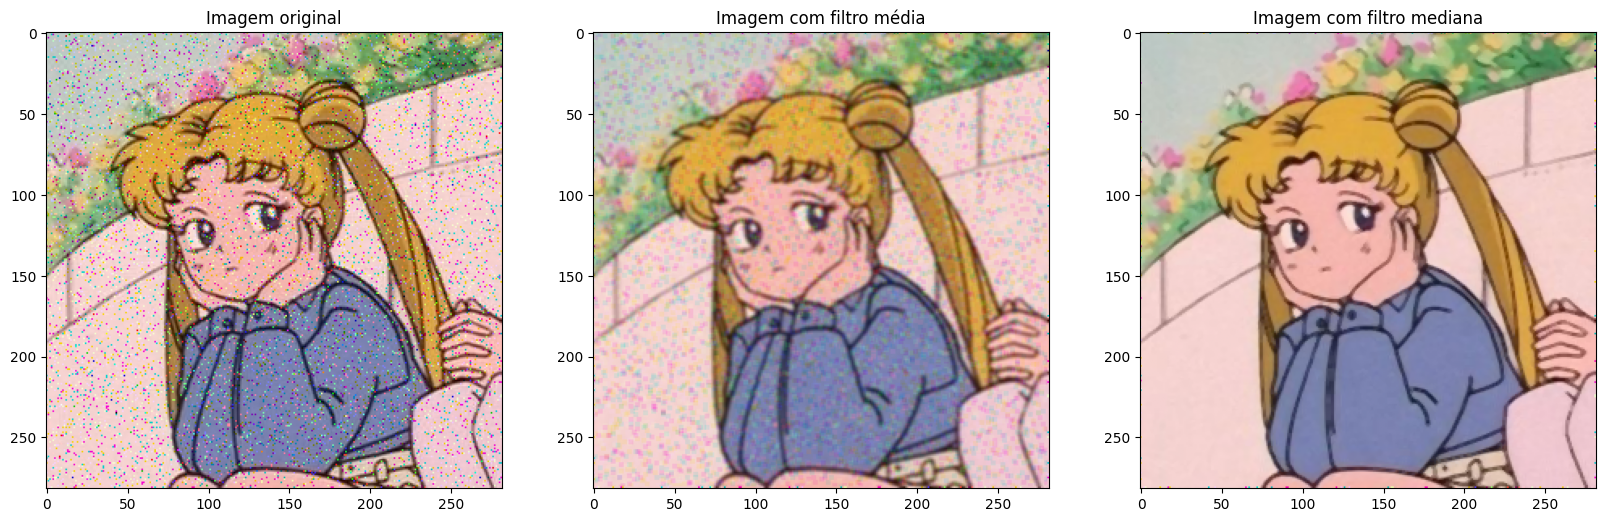

In [ ]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img_ruido)
plt.title('Imagem original')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(imagem_media)
plt.title('Imagem com filtro média')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(imagem_mediana)
plt.title('Imagem com filtro mediana')